In [473]:
import numpy as np
import pandas as pd
from sklearn import model_selection, preprocessing
import xgboost as xgb
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from matplotlib import figure
from matplotlib import pyplot
from scipy.stats import norm

In [474]:
train = pd.read_csv('old_train.csv', parse_dates=['timestamp'])
test = pd.read_csv('old_test.csv', parse_dates=['timestamp'])
id_test = test.id

# PCA

In [475]:
for c in train.columns:
    if c.find('church')!=-1: 
        print c

big_church_km
church_synagogue_km
big_church_count_500
church_count_500
big_church_count_1000
church_count_1000
big_church_count_1500
church_count_1500
big_church_count_2000
church_count_2000
big_church_count_3000
church_count_3000
big_church_count_5000
church_count_5000


In [476]:
col_grp = dict({})
col_grp['church']=['church_count_500','church_count_1000','church_count_1500','church_count_2000',
                   'church_count_3000','church_count_5000']
col_grp['big_church'] =['big_church_count_500','big_church_count_1000','big_church_count_1500','big_church_count_2000',
                        'big_church_count_3000','big_church_count_5000']
col_grp['market'] = ['market_count_500','market_count_1000','market_count_1500','market_count_2000',
                     'market_count_3000','market_count_5000']
col_grp['office'] = ['office_count_500','office_count_1000','office_count_1500','office_count_2000',
                     'office_count_3000','office_count_5000']
col_grp['leisure'] = ['leisure_count_500','leisure_count_1000','leisure_count_1500','leisure_count_2000',
                      'leisure_count_3000','leisure_count_5000']
col_grp['sport'] = ['sport_count_500','sport_count_1000','sport_count_1500','sport_count_2000',
                    'sport_count_3000','sport_count_5000']

loopkeys=list(col_grp.keys())
print loopkeys


['office', 'leisure', 'big_church', 'church', 'sport', 'market']


In [477]:
from sklearn.decomposition import PCA
import bisect
df_all = pd.concat([train,test],ignore_index=True)
print train.shape, test.shape,df_all.shape

(30471, 292) (7662, 291) (38133, 292)


In [478]:
cols = train.columns
df_all=df_all[cols]
df_all.shape

(38133, 292)

In [479]:

newcol = pd.DataFrame ()
for i in loopkeys:
    df = df_all[col_grp[i]].dropna()
    print i, len(df), len(df_all[col_grp[i]])
    pca = PCA()
    df = (df-df.mean())/df.std(ddof=0)
    pca.fit(df)
    varexp = pca.explained_variance_ratio_.cumsum()
    cutoff = bisect.bisect(varexp, 0.95)
    temp=pd.DataFrame(pca.fit_transform(X=df)[:,0:(cutoff+1)],columns=['PCA_'+i+'_'+str(j) for j in range(cutoff+1)],index=df.index)
    newcol = pd.concat([newcol,temp],axis = 1)

office 38133 38133
leisure 38133 38133
big_church 38133 38133
church 38133 38133
sport 38133 38133
market 38133 38133


In [480]:
print newcol.shape
newcol.head(2)

(38133, 16)


,PCA_office_0,PCA_office_1,PCA_leisure_0,PCA_leisure_1,PCA_leisure_2,PCA_big_church_0,PCA_big_church_1,PCA_church_0,PCA_church_1,PCA_sport_0,PCA_sport_1,PCA_sport_2,PCA_market_0,PCA_market_1,PCA_market_2,PCA_market_3
0,-0.569314,-0.099683,-0.706488,-0.073186,0.151477,-0.373553,0.036853,-0.487208,-0.058694,0.467837,0.310473,0.577470,-0.119325,0.705210,0.642803,-0.680249
1,-0.481777,-0.143407,1.443753,-0.211732,1.063894,-0.374161,0.069102,0.008605,-0.201605,0.047799,-0.662240,0.263277,-0.670002,-1.062939,-1.054388,-0.967069


In [481]:
newcol_tr = newcol[:len(train)]
newcol_te = newcol[len(train):]

In [482]:
print newcol_tr.shape, newcol_te.shape

(30471, 16) (7662, 16)


In [483]:
A = np.arange(7662)

In [484]:
newcol_te = newcol_te.set_index(A)

In [485]:
train_pca = pd.concat([train,newcol_tr],axis = 1)
test_pca = pd.concat([test,newcol_te],axis =1)

In [486]:
print train_pca.shape, test_pca.shape

(30471, 308) (7662, 307)


In [487]:
dropcol = []
for i in loopkeys:
    dropcol = dropcol + col_grp[i]


In [488]:
print dropcol

['office_count_500', 'office_count_1000', 'office_count_1500', 'office_count_2000', 'office_count_3000', 'office_count_5000', 'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 'leisure_count_3000', 'leisure_count_5000', 'big_church_count_500', 'big_church_count_1000', 'big_church_count_1500', 'big_church_count_2000', 'big_church_count_3000', 'big_church_count_5000', 'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000', 'church_count_3000', 'church_count_5000', 'sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 'sport_count_3000', 'sport_count_5000', 'market_count_500', 'market_count_1000', 'market_count_1500', 'market_count_2000', 'market_count_3000', 'market_count_5000']


In [489]:
train_pca = train_pca.drop(dropcol,axis =1)

In [490]:
test_pca = test_pca.drop(dropcol,axis=1)

In [491]:
print train_pca.shape, test_pca.shape

(30471, 272) (7662, 271)


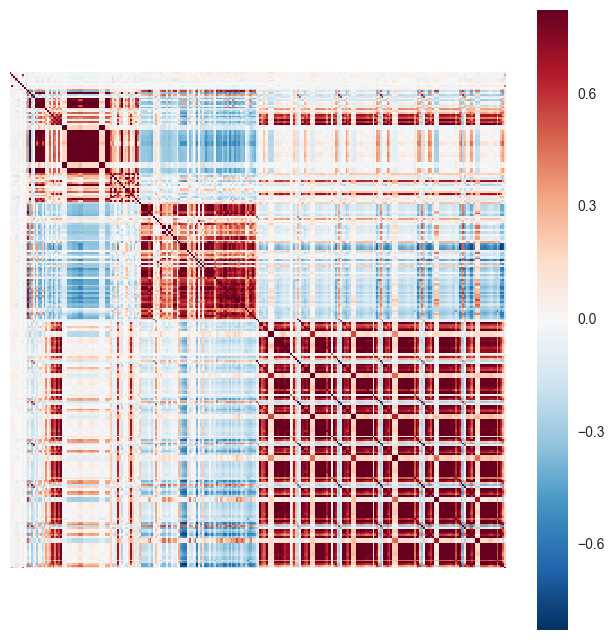

In [492]:
fig, ax = pyplot.subplots(figsize=(8,8))
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8,square=True,xticklabels=False,yticklabels=False,annot=False)

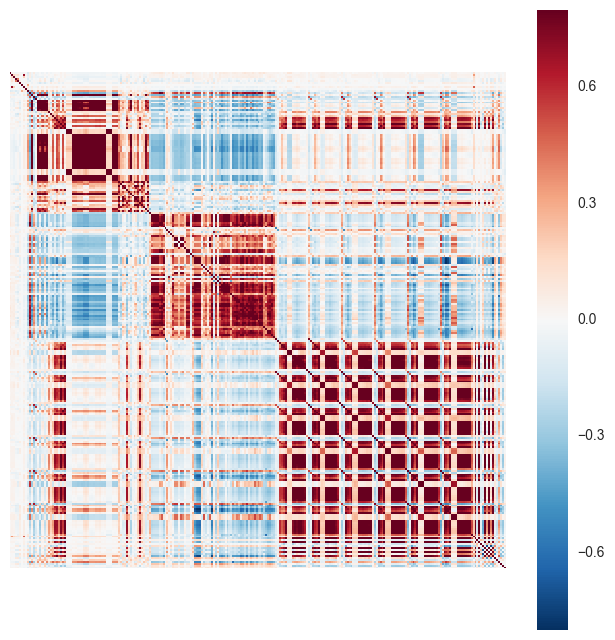

In [493]:
fig, ax = pyplot.subplots(figsize=(8,8))
corrmat = train_pca.corr()
sns.heatmap(corrmat, vmax=.8, square=True,xticklabels=False,yticklabels=False,annot=False)
# correlation on bottom right get improved

In [494]:
#train_pca.to_csv('old_train_pca.csv',index=False)
#test_pca.to_csv('old_test_pca.csv',index = False)

# First model

In [575]:
train = pd.read_csv('train_pca.csv', parse_dates=['timestamp'])
test = pd.read_csv('test_pca.csv', parse_dates=['timestamp'])
id_test = test.id
#build_year_13117= 1970
#age = 2013

In [572]:
print train.shape, test.shape

(30471, 292) (7662, 280)


0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
5         9100000
6         5500000
7         2000000
8         5300000
9         2000000
10        4650000
11        4800000
12        5100000
13        5200000
14        5000000
15        1850000
16        6300000
17        5900000
18        7900000
19        5200000
20        8200000
21        5200000
22        6250000
23        5750000
24        6000000
25        1050000
26        5000000
27        4700000
28        8254400
29        5900000
           ...   
30441    25039300
30442     4350000
30443     7567425
30444    11438948
30445    10139368
30446     6125400
30447     6373324
30448     6888144
30449     9227657
30450    12610000
30451     2394300
30452     6800000
30453     4066740
30454     6300000
30455     9014972
30456     1000000
30457     7800000
30458     6370777
30459     5778893
30460     9500000
30461     5000000
30462    10544070
30463    12000000
30464    10262010
30465     

In [553]:
test.shape

(7662, 273)

In [554]:
#train.loc[13117, "build_year"]
#train.loc[13117,"age"]

In [555]:
bad_index = train[train.life_sq > train.full_sq].index
train.loc[bad_index, "life_sq"] = np.NaN
equal_index = [601,1896,2791]
test.loc[equal_index, "life_sq"] = test.loc[equal_index, "full_sq"]
bad_index = test[test.life_sq > test.full_sq].index
test.loc[bad_index, "life_sq"] = np.NaN
bad_index = train[train.life_sq < 5].index
train.loc[bad_index, "life_sq"] = np.NaN
bad_index = test[test.life_sq < 5].index
test.loc[bad_index, "life_sq"] = np.NaN
bad_index = train[train.full_sq < 5].index
train.loc[bad_index, "full_sq"] = np.NaN
bad_index = test[test.full_sq < 5].index
test.loc[bad_index, "full_sq"] = np.NaN
#kitch_is_build_year = [13117]
#train.loc[kitch_is_build_year, "build_year"] = train.loc[kitch_is_build_year, "kitch_sq"]
kitch_is_build_year = [13117]
train.loc[kitch_is_build_year, "build_year"] = train.loc[kitch_is_build_year, "kitch_sq"]
bad_index = train[train.kitch_sq >= train.life_sq].index
train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = test[test.kitch_sq >= test.life_sq].index
test.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = train[(train.kitch_sq == 0).values + (train.kitch_sq == 1).values].index
train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = test[(test.kitch_sq == 0).values + (test.kitch_sq == 1).values].index
test.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = train[(train.full_sq > 210) & (train.life_sq / train.full_sq < 0.3)].index
train.loc[bad_index, "full_sq"] = np.NaN
bad_index = test[(test.full_sq > 150) & (test.life_sq / test.full_sq < 0.3)].index
test.loc[bad_index, "full_sq"] = np.NaN
bad_index = train[train.life_sq > 300].index
train.loc[bad_index, ["life_sq", "full_sq"]] = np.NaN
bad_index = test[test.life_sq > 200].index
test.loc[bad_index, ["life_sq", "full_sq"]] = np.NaN
train.product_type.value_counts(normalize= True)
test.product_type.value_counts(normalize= True)
bad_index = train[train.build_year < 1500].index
train.loc[bad_index, "build_year"] = np.NaN
#bad_index = test[test.build_year < 1500].index
#test.loc[bad_index, "build_year"] = np.NaN
bad_index = train[train.num_room == 0].index
train.loc[bad_index, "num_room"] = np.NaN
bad_index = test[test.num_room == 0].index
test.loc[bad_index, "num_room"] = np.NaN
bad_index = [10076, 11621, 17764, 19390, 24007, 26713, 29172]
train.loc[bad_index, "num_room"] = np.NaN
bad_index = [3174, 7313]
test.loc[bad_index, "num_room"] = np.NaN
bad_index = train[(train.floor == 0).values * (train.max_floor == 0).values].index
train.loc[bad_index, ["max_floor", "floor"]] = np.NaN
bad_index = train[train.floor == 0].index
train.loc[bad_index, "floor"] = np.NaN
bad_index = train[train.max_floor == 0].index
train.loc[bad_index, "max_floor"] = np.NaN
bad_index = test[test.max_floor == 0].index
test.loc[bad_index, "max_floor"] = np.NaN
bad_index = train[train.floor > train.max_floor].index
train.loc[bad_index, "max_floor"] = np.NaN
bad_index = test[test.floor > test.max_floor].index
test.loc[bad_index, "max_floor"] = np.NaN
train.floor.describe(percentiles= [0.9999])
bad_index = [23584]
train.loc[bad_index, "floor"] = np.NaN
train.material.value_counts()
test.material.value_counts()
train.state.value_counts()
bad_index = train[train.state == 33].index
train.loc[bad_index, "state"] = np.NaN
test.state.value_counts()



2.0    2662
1.0    2266
3.0    1913
4.0     127
Name: state, dtype: int64

In [556]:
train.shape, test.shape

((30471, 274), (7662, 273))

In [557]:
# brings error down a lot by removing extreme price per sqm
train.loc[train.full_sq == 0, 'full_sq'] = 50
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

# Add month-year
month_year = (train.timestamp.dt.month + train.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
train['month_year_cnt'] = month_year.map(month_year_cnt_map)

month_year = (test.timestamp.dt.month + test.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
test['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (train.timestamp.dt.weekofyear + train.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
train['week_year_cnt'] = week_year.map(week_year_cnt_map)

week_year = (test.timestamp.dt.weekofyear + test.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
test['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
train['month'] = train.timestamp.dt.month
train['dow'] = train.timestamp.dt.dayofweek

test['month'] = test.timestamp.dt.month
test['dow'] = test.timestamp.dt.dayofweek

# Other feature engineering
train['rel_floor'] = 0.05+train['floor'] / train['max_floor'].astype(float)
train['rel_kitch_sq'] = 0.05+train['kitch_sq'] / train['full_sq'].astype(float)

test['rel_floor'] = 0.05+test['floor'] / test['max_floor'].astype(float)
test['rel_kitch_sq'] = 0.05+test['kitch_sq'] / test['full_sq'].astype(float)

train.apartment_name=train.sub_area + train['metro_km_avto'].astype(str)
test.apartment_name=test.sub_area + train['metro_km_avto'].astype(str)

train['room_size'] = train['life_sq'] / train['num_room'].astype(float)
test['room_size'] = test['life_sq'] / test['num_room'].astype(float)

In [558]:
# Aggreagte house price data derived from 
# http://www.globalpropertyguide.com/real-estate-house-prices/R#russia
# by luckyzhou
# See https://www.kaggle.com/luckyzhou/lzhou-test/comments

rate_2015_q2 = 1
rate_2015_q1 = rate_2015_q2 / .9932
rate_2014_q4 = rate_2015_q1 / 1.0112
rate_2014_q3 = rate_2014_q4 / 1.0169
rate_2014_q2 = rate_2014_q3 / 1.0086
rate_2014_q1 = rate_2014_q2 / 1.0126
rate_2013_q4 = rate_2014_q1 / 0.9902
rate_2013_q3 = rate_2013_q4 / 1.0041
rate_2013_q2 = rate_2013_q3 / 1.0044
rate_2013_q1 = rate_2013_q2 / 1.0104  # This is 1.002 (relative to mult), close to 1:
rate_2012_q4 = rate_2013_q1 / 0.9832  #     maybe use 2013q1 as a base quarter and get rid of mult?
rate_2012_q3 = rate_2012_q4 / 1.0277
rate_2012_q2 = rate_2012_q3 / 1.0279
rate_2012_q1 = rate_2012_q2 / 1.0279
rate_2011_q4 = rate_2012_q1 / 1.076
rate_2011_q3 = rate_2011_q4 / 1.0236
rate_2011_q2 = rate_2011_q3 / 1
rate_2011_q1 = rate_2011_q2 / 1.011


# train 2015
train['average_q_price'] = 1

train_2015_q2_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2015_q2_index, 'average_q_price'] = rate_2015_q2

train_2015_q1_index = train.loc[train['timestamp'].dt.year == 2015].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2015_q1_index, 'average_q_price'] = rate_2015_q1


# train 2014
train_2014_q4_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2014_q4_index, 'average_q_price'] = rate_2014_q4

train_2014_q3_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2014_q3_index, 'average_q_price'] = rate_2014_q3

train_2014_q2_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2014_q2_index, 'average_q_price'] = rate_2014_q2

train_2014_q1_index = train.loc[train['timestamp'].dt.year == 2014].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2014_q1_index, 'average_q_price'] = rate_2014_q1


# train 2013
train_2013_q4_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2013_q4_index, 'average_q_price'] = rate_2013_q4

train_2013_q3_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2013_q3_index, 'average_q_price'] = rate_2013_q3

train_2013_q2_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2013_q2_index, 'average_q_price'] = rate_2013_q2

train_2013_q1_index = train.loc[train['timestamp'].dt.year == 2013].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2013_q1_index, 'average_q_price'] = rate_2013_q1


# train 2012
train_2012_q4_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2012_q4_index, 'average_q_price'] = rate_2012_q4

train_2012_q3_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2012_q3_index, 'average_q_price'] = rate_2012_q3

train_2012_q2_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2012_q2_index, 'average_q_price'] = rate_2012_q2

train_2012_q1_index = train.loc[train['timestamp'].dt.year == 2012].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2012_q1_index, 'average_q_price'] = rate_2012_q1


# train 2011
train_2011_q4_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 10].loc[train['timestamp'].dt.month <= 12].index
train.loc[train_2011_q4_index, 'average_q_price'] = rate_2011_q4

train_2011_q3_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 7].loc[train['timestamp'].dt.month < 10].index
train.loc[train_2011_q3_index, 'average_q_price'] = rate_2011_q3

train_2011_q2_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 4].loc[train['timestamp'].dt.month < 7].index
train.loc[train_2011_q2_index, 'average_q_price'] = rate_2011_q2

train_2011_q1_index = train.loc[train['timestamp'].dt.year == 2011].loc[train['timestamp'].dt.month >= 1].loc[train['timestamp'].dt.month < 4].index
train.loc[train_2011_q1_index, 'average_q_price'] = rate_2011_q1

train['price_doc'] = train['price_doc'] * train['average_q_price']



In [559]:
train.shape, test.shape

((30396, 282), (7662, 280))

In [560]:
mult = 1.054880504
train['price_doc'] = train['price_doc'] * mult
y_train = train["price_doc"]
x_train = train.drop(["id", "timestamp", "price_doc", "average_q_price"], axis=1)
#x_test = test.drop(["id", "timestamp", "average_q_price"], axis=1)
x_test = test.drop(["id", "timestamp"], axis=1)

num_train = len(x_train)
x_all = pd.concat([x_train, x_test])

for c in x_all.columns:
    if x_all[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_all[c].values))
        x_all[c] = lbl.transform(list(x_all[c].values))

x_train = x_all[:num_train]
x_test = x_all[num_train:]
print x_train.shape,x_test.shape,y_train.shape

(30396, 278) (7662, 278) (30396,)


In [561]:

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.6,
    'colsample_bytree': 1,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

#xgb_params = 
#    'eta': 0.05,
#    'max_depth': 6,
 #   'subsample': 0.6,
# 'colsample_bytree': 1,
  #  'objective': 'reg:linear',
#   'eval_metric': 'rmse',
# 'silent': 1
#

#xgb_params = {
#    'eta': 0.1,
#    'max_depth': 5,
#    'subsample': 0.8,
#    'min_child_weight':4,
#    'colsample_bytree': 0.8,
#    'colsample_bylevel':1,
#    'n_estimators':300,
#    'max_delta_step':0,
#    'objective': 'reg:linear',
#    'eval_metric': 'rmse',
#    'silent': 1
    
    
    
#}


#estimator = xgb.XGBRegressor(max_depth=5, min_child_weight=4,
                     #gamma=0, reg_alpha=3000, reg_lambda=1, 
                     #subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, 
                    # learning_rate=0.1, n_estimators=300, silent=1, objective='reg:linear', 
                     #max_delta_step=0, scale_pos_weight=1, 
                    # base_score=0.5, seed=28, missing=None)

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)


num_boost_rounds = 422
model1 = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)




In [562]:
print x_train.shape,x_test.shape

(30396, 278) (7662, 278)


In [563]:
y_predict = model.predict(dtest)
y_predict =np.exp(y_predict)
gunja_output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})

In [564]:
gunja_output.head()

,id,price_doc
0,30474,inf
1,30475,inf
2,30476,inf
3,30477,inf
4,30478,inf


# Second Model

In [508]:
train = pd.read_csv('train_pca.csv')
test = pd.read_csv('test_pca.csv')
id_test = test.id

mult = .969

y_train2 = train["price_doc"] * mult + 10
x_train2 = train.drop(["id", "timestamp", "price_doc"], axis=1)
x_test2 = test.drop(["id", "timestamp"], axis=1)

for c in x_train2.columns:
    if x_train2[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train2[c].values))
        x_train2[c] = lbl.transform(list(x_train2[c].values))

for c in x_test2.columns:
    if x_test2[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test2[c].values))
        x_test2[c] = lbl.transform(list(x_test2[c].values))

xgb_params = {
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'min_child_weight':4,
    'colsample_bytree': 0.8,
    'colsample_bylevel':1,
    'n_estimators':300,
    'max_delta_step':0,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
    
    
    
}


dtrain = xgb.DMatrix(x_train2, y_train2)
dtest = xgb.DMatrix(x_test2)

num_boost_rounds = 385  # This was the CV output, as earlier version shows
model2 = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

y_predict = model2.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})

# Third model

In [509]:
df_train = pd.read_csv("train_pca.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("test_pca.csv", parse_dates=['timestamp'])
df_macro = pd.read_csv("macro.csv", parse_dates=['timestamp'])

df_train.drop(df_train[df_train["life_sq"] > 7000].index, inplace=True)

mult = 0.969
y_train3 = df_train['price_doc'].values * mult + 10
id_test = df_test['id']

df_train.drop(['id', 'price_doc'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
# Next line just adds a lot of NA columns (becuase "join" only works on indexes)
# but somewhow it seems to affect the result
df_all = df_all.join(df_macro, on='timestamp', rsuffix='_macro')
print(df_all.shape)

# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

(38132, 372)


In [510]:
# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

train['building_name'] = pd.factorize(train.sub_area + train['metro_km_avto'].astype(str))[0]
test['building_name'] = pd.factorize(test.sub_area + test['metro_km_avto'].astype(str))[0]

def add_time_features(col):
   col_month_year = pd.Series(pd.factorize(train[col].astype(str) + month_year.astype(str))[0])
   train[col + '_month_year_cnt'] = col_month_year.map(col_month_year.value_counts())

   col_week_year = pd.Series(pd.factorize(train[col].astype(str) + week_year.astype(str))[0])
   train[col + '_week_year_cnt'] = col_week_year.map(col_week_year.value_counts())

add_time_features('building_name')
add_time_features('sub_area')

def add_time_features(col):
   col_month_year = pd.Series(pd.factorize(test[col].astype(str) + month_year.astype(str))[0])
   test[col + '_month_year_cnt'] = col_month_year.map(col_month_year.value_counts())

   col_week_year = pd.Series(pd.factorize(test[col].astype(str) + week_year.astype(str))[0])
   test[col + '_week_year_cnt'] = col_week_year.map(col_week_year.value_counts())

add_time_features('building_name')
add_time_features('sub_area')

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp', 'timestamp_macro'], axis=1, inplace=True)


factorize = lambda t: pd.factorize(t[1])[0]

df_obj = df_all.select_dtypes(include=['object'])

X_all = np.c_[
    df_all.select_dtypes(exclude=['object']).values,
    np.array(list(map(factorize, df_obj.iteritems()))).T
]
print(X_all.shape)

X_train = X_all[:num_train]
X_test = X_all[num_train:]


# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)


# Convert to numpy values
X_all = df_values.values
print(X_all.shape)

X_train3 = X_all[:num_train]
X_test3 = X_all[num_train:]

df_columns = df_values.columns

(38132, 376)
(38132, 376)


In [511]:
type(X_train3)

numpy.ndarray

In [512]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'min_child_weight':4,
    'colsample_bytree': 0.8,
    'colsample_bylevel':1,
    'n_estimators':300,
    'max_delta_step':0,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
    
    
    
}

dtrain = xgb.DMatrix(X_train3, y_train3, feature_names=df_columns)
dtest = xgb.DMatrix(X_test3, feature_names=df_columns)

num_boost_rounds = 420  # From Bruno's original CV, I think
model3 = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

y_pred = model3.predict(dtest)

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

In [513]:
first_result = output.merge(df_sub, on="id", suffixes=['_louis','_bruno'])
first_result["price_doc"] = np.exp( .714*np.log(first_result.price_doc_louis) +
                                    .286*np.log(first_result.price_doc_bruno) ) 
result = first_result.merge(gunja_output, on="id", suffixes=['_follow','_gunja'])

result["price_doc"] = np.exp( .78*np.log(result.price_doc_follow) +
                              .22*np.log(result.price_doc_gunja) )
                              
result["price_doc"] =result["price_doc"] *0.9915        
result.drop(["price_doc_louis","price_doc_bruno","price_doc_follow","price_doc_gunja"],axis=1,inplace=True)
result.head()

,id,price_doc
0,30474,inf
1,30475,inf
2,30476,inf
3,30477,inf
4,30478,inf


In [514]:
#result.to_csv('0625-initial.csv',index = False)

# Rounding adjustment

In [515]:
prediction_stderr = 0.0073 #  assumed standard error of predictions
                          #  (smaller values make output closer to input)
train_test_logmean_diff = 0.1 # assumed shift used to adjust frequencies for time trend
probthresh = 90  # minimum probability*frequency to use new price instead of just rounding
rounder = 2  # number of places left of decimal point to zero


In [516]:
preds = result
train = pd.read_csv('train_pca_with_age.csv')
test = pd.read_csv('test_pca_with_age.csv')

# Select investment sales from training set and generate frequency distribution
invest = train[train.product_type=="Investment"]
freqs = invest.price_doc.value_counts().sort_index()

# Select investment sales from test set predictions
test_invest_ids = test[test.product_type=="Investment"]["id"]
invest_preds = pd.DataFrame(test_invest_ids).merge(preds, on="id")

# Express X-axis of training set frequency distribution as logarithms, 
#    and save standard deviation to help adjust frequencies for time trend.
lnp = np.log(invest.price_doc)
stderr = lnp.std()
lfreqs = lnp.value_counts().sort_index()

# Adjust frequencies for time trend
lnp_diff = train_test_logmean_diff
lnp_mean = lnp.mean()
lnp_newmean = lnp_mean + lnp_diff

def norm_diff(value):
    return norm.pdf((value-lnp_diff)/stderr) / norm.pdf(value/stderr)

newfreqs = lfreqs * (pd.Series(lfreqs.index.values-lnp_newmean).apply(norm_diff).values)

# Logs of model-predicted prices
lnpred = np.log(invest_preds.price_doc)

# Create assumed probability distributions
stderr = prediction_stderr
mat =(np.array(newfreqs.index.values)[:,np.newaxis] - np.array(lnpred)[np.newaxis,:])/stderr
modelprobs = norm.pdf(mat)

# Multiply by frequency distribution.
freqprobs = pd.DataFrame( np.multiply( np.transpose(modelprobs), newfreqs.values ) )
freqprobs.index = invest_preds.price_doc.values
freqprobs.columns = freqs.index.values.tolist()

# Find mode for each case.
prices = freqprobs.idxmax(axis=1)

# Apply threshold to exclude low-confidence cases from recoding
priceprobs = freqprobs.max(axis=1)
mask = priceprobs<probthresh
prices[mask] = np.round(prices[mask].index,-rounder)

# Data frame with new predicitons
newpricedf = pd.DataFrame( {"id":test_invest_ids.values, "price_doc":prices} )

# Merge these new predictions (for just investment properties) back into the full prediction set.
newpreds = preds.merge(newpricedf, on="id", how="left", suffixes=("_old",""))
newpreds.loc[newpreds.price_doc.isnull(),"price_doc"] = newpreds.price_doc_old
newpreds.drop("price_doc_old",axis=1,inplace=True)
newpreds.head()

#newpreds.to_csv('0625_round_log.csv', index=False)

,id,price_doc
0,30474,inf
1,30475,inf
2,30476,inf
3,30477,inf
4,30478,inf


# Macro adjustment

In [517]:
#macro1 Trade balance, Mortgage rate, cpi
#macro2 introduce naive cpi

In [518]:
import statsmodels.api as sm

In [519]:
macro = pd.read_csv('macro.csv')
train_andy = pd.read_csv('train_pca_with_age.csv')
test_andy = pd.read_csv('test_pca_with_age.csv')

In [520]:
macro["timestamp"] = pd.to_datetime(macro["timestamp"])
macro["year"]  = macro["timestamp"].dt.year
macro["month"] = macro["timestamp"].dt.month
macro["yearmonth"] = 100*macro.year + macro.month
macmeds = macro.groupby("yearmonth").median()

In [521]:
train_andy["timestamp"] = pd.to_datetime(train_andy["timestamp"])
train_andy["year"]  = train_andy["timestamp"].dt.year
train_andy["month"] = train_andy["timestamp"].dt.month
train_andy["yearmonth"] = 100*train_andy.year + train_andy.month
prices = train_andy[["yearmonth","price_doc"]]
p = prices.groupby("yearmonth").median()
p.head(3)

,price_doc
yearmonth,
201108,5850000
201109,5200000
201110,5500000


In [522]:
df = macmeds.join(p)
print df.shape
df.head(3)

(82, 99)


,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,year,month,price_doc
yearmonth,,,,,,,,,,,,,,,,,,,,,
201001,76.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.77500,42.5601,...,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,2010,1,NaN
201002,72.97,NaN,NaN,315.1,337.2,NaN,18.114,NaN,30.11925,41.1596,...,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,2010,2,NaN
201003,77.03,NaN,NaN,317.7,343.9,NaN,16.704,NaN,29.52680,40.2498,...,0.41,993.0,NaN,NaN,63.03,22825.0,NaN,2010,3,NaN


In [523]:
import numpy.matlib as ml
 
def almonZmatrix(X, maxlag, maxdeg):
    """
    Creates the Z matrix corresponding to vector X.
    """
    n = len(X)
    Z = ml.zeros((len(X)-maxlag, maxdeg+1))
    for t in range(maxlag,  n):
       #Solve for Z[t][0].
       Z[t-maxlag,0] = sum([X[t-lag] for lag in range(maxlag+1)])
       for j in range(1, maxdeg+1):
             s = 0.0
             for i in range(1, maxlag+1):       
                s += (i)**j * X[t-i]
             Z[t-maxlag,j] = s
    return Z
# len(X)-maxlag because the first n(maxlag) value cannot be calculated for lacking of data

In [524]:
y = df.price_doc.div(df.cpi).apply(np.log).loc[201108:201506]

In [525]:
lncpi = df.cpi.apply(np.log)
tblags = 5    # Number of lags used on PDL for Trade Balance
mrlags = 5    # Number of lags used on PDL for Mortgage Rate
cplags = 5    # Number of lags used on PDL for CPI
#gplags = 5
ztb = almonZmatrix(df.balance_trade.loc[201103:201506].as_matrix(), tblags, 1)
zmr = almonZmatrix(df.mortgage_rate.loc[201103:201506].as_matrix(), mrlags, 1)
zcp = almonZmatrix(lncpi.loc[201103:201506].as_matrix(), cplags, 1)
#zgp = almonZmatrix(df.gdp_quart_growth.loc[201103:201506].as_matrix(), gplags, 1)
print np.shape(ztb), np.shape(zmr), np.shape(zcp)
columns = ['tb0', 'tb1', 'mr0', 'mr1', 'cp0', 'cp1']
z = pd.DataFrame( np.concatenate( (ztb, zmr, zcp), axis=1), index=y.index.values, columns=columns )
z.head(3)

(47, 2) (47, 2) (47, 2)


,tb0,tb1,mr0,mr1,cp0,cp1
201108,104.098,268.575,73.01,184.40,35.177686,87.881303
201109,101.103,262.387,72.50,182.83,35.192806,87.947499
201110,101.265,261.268,71.70,181.11,35.201341,87.992705


In [526]:
X = sm.add_constant( z )
eq = sm.OLS(y, X)
fit = eq.fit()
# Predict with macro model
test_Jason_andy_cpi = df.cpi.loc[201507:201605]
test_Jason_andy_index = test_Jason_andy_cpi.index
ztb_test_Jason_andy = almonZmatrix(df.balance_trade.loc[201502:201605].as_matrix(), tblags, 1)
zmr_test_Jason_andy = almonZmatrix(df.mortgage_rate.loc[201502:201605].as_matrix(), mrlags, 1)
zcp_test_Jason_andy = almonZmatrix(lncpi.loc[201502:201605].as_matrix(), cplags, 1)
#zgp_test_Jason_andy = almonZmatrix(df.gdp_quart_growth.loc[201502:201605].as_matrix(), gplags, 1)
z_test_Jason_andy = pd.DataFrame( np.concatenate( (ztb_test_Jason_andy, zmr_test_Jason_andy, zcp_test_Jason_andy), axis=1), 
                       test_Jason_andy_index, columns )
X_test_Jason_andy = sm.add_constant( z_test_Jason_andy )
pred_lnrp = fit.predict( X_test_Jason_andy )
pred_p = np.exp(pred_lnrp) * test_Jason_andy_cpi
test_andy["timestamp"] = pd.to_datetime(test_andy["timestamp"])
test_andy["year"]  = test_andy["timestamp"].dt.year
test_andy["month"] = test_andy["timestamp"].dt.month
test_andy["yearmonth"] = 100*test_andy.year + test_andy.month
test_andy_ids = test_andy[["yearmonth","id"]]
print test_andy.shape, test_andy_ids.shape

(7662, 277) (7662, 2)


In [527]:
monthprices = pd.DataFrame({"yearmonth":pred_p.index.values,"monthprice":pred_p.values})


In [528]:
test_andy_mac_price = test_andy_ids.merge(monthprices, on="yearmonth")

In [529]:
test_andy_mac_price.head(2)

,yearmonth,id,monthprice
0,201507,30474,6.792556e+06
1,201507,30475,6.792556e+06


In [530]:
macro_mean = np.exp(test_andy_mac_price.monthprice.apply(np.log).mean())
macro_mean

6593788.9287249846

In [531]:
#naive_pred_lnrp = y.mean()
#naive_pred_p = np.exp(naive_pred_lnrp) * test_Jason_andy_cpi
#monthnaive = pd.DataFrame({"yearmonth":pred_p.index.values, "monthprice":naive_pred_p.values})
#macro_naive = np.exp(test_andy_ids.merge(monthnaive, on="yearmonth").monthprice.apply(np.log).mean())
#print macro_naive
# Combine naive and substantive macro models
#macro_mean = macro_naive * (macro_mean/macro_naive) ** macro_humility_factor
#macro_mean


In [532]:
results = newpreds
results.head(5)

,id,price_doc
0,30474,inf
1,30475,inf
2,30476,inf
3,30477,inf
4,30478,inf


In [533]:
def scale_miss(
        alpha,
        shifted_logs,
        oldstd,
        new_logmean
        ):
    newlogs = new_logmean + alpha*(shifted_logs - new_logmean)
    newstd = np.std(np.exp(newlogs))
    return (newstd-oldstd)**2
    

def shift_logmean_but_keep_scale(  # Or change the scale, but relative to the old scale
        data,
        new_logmean,
        rescaler
        ):
    logdata = np.log(data)
    oldstd = data.std()
    shift = new_logmean - logdata.mean()
    shifted_logs = logdata + shift
    scale = sp.optimize.leastsq( scale_miss, 1, args=(shifted_logs, oldstd, new_logmean) )
    alpha = scale[0][0]
    newlogs = new_logmean + rescaler*alpha*(shifted_logs - new_logmean)
    return np.exp(newlogs)

In [534]:
import scipy as sp
micro_humility_factor = 1.00   #    range from 0 (complete humility) to 1 (no humility)
macro_humility_factor = 0.96
lnm = np.log(macro_mean)
y_predict = shift_logmean_but_keep_scale( results.price_doc, lnm, micro_humility_factor )
sub = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
print sub.shape


(7662, 2)


In [535]:
sub.head()

,id,price_doc
0,30474,NaN
1,30475,NaN
2,30476,NaN
3,30477,NaN
4,30478,NaN


In [536]:
sub.to_csv('0627_newpara1.csv', index=False)

# Cross validation

In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
weight_val_score = []
bias_list=[]
cv_p = p
cv_p['yearmonth'] = cv_p.index.values
cv_p.columns= ['monthprice','yearmonth']
train_andy_v = train_andy[["yearmonth","id"]]
train_andy_macro_= train_andy_v.merge(cv_p, on = 'yearmonth')

In [ ]:
train_andy_macro_.head()

In [ ]:
def rmsle(Truth, prediction):
    C = np.square(np.log(Truth+1)-np.log(prediction+1))
    return np.sqrt(np.sum(C)/len(Truth))

In [ ]:


for i in xrange(10):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.2)
    Pick_index = list(y_test1.index)
    if 13546 in Pick_index:
        Pick_index.remove(13546)    
    test_v_id = x_train['id'].loc[Pick_index]
    y_true = y_test1.ix[Pick_index]
    #model 1
    x_test_1v = x_train.ix[Pick_index]
    dtest_1v = xgb.DMatrix(x_test_1v)
    y_pred_1v = model1.predict(dtest_1v)
    output_1v = pd.DataFrame({'id': test_v_id, 'price_doc': y_pred_1v})
    #model 2
    x_test_2v = x_train2.ix[Pick_index]
    dtest_2v = xgb.DMatrix(x_test_2v)
    y_pred_2v = model2.predict(dtest_2v)
    output_2v = pd.DataFrame({'id': test_v_id, 'price_doc': y_pred_2v})
    #model 3
    x_train3 = pd.DataFrame(X_train3)
    x_test_3v = x_train3.ix[Pick_index]
    dtest_3v = xgb.DMatrix(x_test_3v,feature_names=df_columns)
    y_pred_3v = model3.predict(dtest_3v)
    output_3v = pd.DataFrame({'id': test_v_id, 'price_doc': y_pred_3v})
    #Merge result
    first_result = output_2v.merge(output_3v, on="id", suffixes=['_louis','_bruno'])
    first_result["price_doc"] = np.exp( .714*np.log(first_result.price_doc_louis) +
                                    .286*np.log(first_result.price_doc_bruno) ) 
    results_v = first_result.merge(output_1v, on="id", suffixes=['_follow','_gunja'])

    results_v["price_doc"] = np.exp( .78*np.log(results_v.price_doc_follow) +
                              .22*np.log(results_v.price_doc_gunja) )
                              
    results_v["price_doc"] =results_v["price_doc"] *0.9915        
    results_v.drop(["price_doc_louis","price_doc_bruno","price_doc_follow","price_doc_gunja"],axis=1,inplace=True)
    
    #Introduce Round  
    
    
    #Introduce Macro
    
    train_andy_macro_v = train_andy_macro_.ix[Pick_index]
    macro_v_mean = np.exp(train_andy_macro_v.monthprice.apply(np.log).mean())
    lnm_v = np.log(macro_v_mean)
    y_predict_v = shift_logmean_but_keep_scale( results_v.price_doc, lnm_v, micro_humility_factor )
    v_score = rmsle(y_true, y_predict_v)
    print v_score
    
    weight_val_score.append(v_score)
    #y_predict_v.index = y_true.index.values
    #bad_index = y_true.loc[(abs(y_predict_v-y_true)/y_true)>0.8].index.values
    #bias_list_04.append(bad_index)